# (In)complete numbers of international football (Version 1)

Dataset which we gonna use includes 41,586 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.


![image](images/image.jpg)

## Start by importing needed libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [94]:
# sns.set_theme()
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(16,13)})


## Our data contains following columns
- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


In [95]:
data = pd.read_csv('results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Cleaning, processing and first exploration
As seen above the the first game is the inaugaral game Scotland vs England in 1872. For each game we have the, teams, score (home_score and away_score), match type (tournament), city and the country. We also have information about matches played on neutral venue.

In [96]:
# col_with_missing_value = [col for col in data.columns
#                             if data[col].isnull().any()]

In [97]:
#checking if there is any missing value
# data.isnull().any()
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

## Creating new columns
We will now create a new column to have quicker acces to some important feature such as who won the game. The outcome of the game will be "D" for draw, "H" for the home_team winning, "A" for the away_team winning. 

In [98]:
conditions = [
    (data['home_score'] > data['away_score']),
    (data['home_score'] < data['away_score']),
    (data['home_score'] == data['away_score'])
]

values = ['H', 'A', 'D']

data['outcome'] = np.select(conditions, values)
data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,H
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,A
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,A
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,H
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,H


Create two columns - winning_team, losing_team

In [99]:
def label_winning_column(row):
    if row['outcome'] == "H":
        return row['home_team']
    elif row['outcome'] == 'A':
        return row['away_team']
    else:
        return "No one"

def label_loser_column(row):
    if row['outcome'] == "H":
        return row['away_team']
    elif row['outcome'] == 'A':
        return row['home_team']
    else:
        return "No one"

In [100]:
data['winner'] = data.apply(lambda row: label_winning_column(row), axis=1)

In [101]:
data['loser'] = data.apply(lambda row: label_loser_column(row), axis=1)

In [102]:
data.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,No one,No one
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,No one,No one
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H,Scotland,England


## The first national game recognised by FIFA

The First game in our dataset was played on November 30, 1872 between Scotland and England. There were actually five unofficial international matches played between Scotland and England since 1870, none of which Scotland won. But the first official match - ended in a draw between Scotland and England, with score 0-0. This match is officially recognised by FIFA as the sport's first-ever international. The game took place at Hamilton Crescent, Glasgow (Scotland) and was watched by 4000 spectators.
The Scots wore dark blue shirts, the English wore white shirts with caps, while Scots wore red cowls. 

The teams for this match were gathered together "with some difficulty, each side losing some of their best men almost at the last moment". All eleven Scottish players were selected from Queen's Park, the leading Scottish club at this time. The Scottish side was selected by goalkeeper and captain Robert Gardner, the English side was selected by Charles Alcock (Alcock himself was unable to play due to injury).



In [103]:
#first game
data.iloc[[0]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,No one,No one


![image](images/squad.png)

## Last game in our dataset

Our dataset contains 41639 games. Last game is UEFA Nation League match played between San Marino and Liechtenstein on neutral stadium in Rimini, Italy.

In [104]:
data.iloc[[-1]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser
41639,2020-09-08,San Marino,Liechtenstein,0,2,UEFA Nations League,Rimini,Italy,True,A,Liechtenstein,San Marino


# Stats and numbers

In [105]:
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser
3361,1952-08-24,Silesia,China PR,5,1,Friendly,Chorzów,Poland,False,H,Silesia,China PR
597,1921-09-25,Chile,Argentina,1,4,Friendly,Viña del Mar,Chile,False,A,Argentina,Chile
10957,1979-09-01,Wallis Islands and Futuna,Samoa,3,1,South Pacific Games,Nausori,Fiji,True,H,Wallis Islands and Futuna,Samoa
30736,2008-10-11,Hungary,Albania,2,0,FIFA World Cup qualification,Budapest,Hungary,False,H,Hungary,Albania
18,1881-03-14,Wales,Scotland,1,5,Friendly,Wrexham,Wales,False,A,Scotland,Wales


## How many games per year?

Let's now check how many games were played each year and how the total number of international games evolve with time. But before we do that, let's create another features containing year, month and day! 

In [106]:
# year = data['date'].apply(lambda row: row.split('-'))
data['year'] = data['date'].apply(lambda row: row.split('-')[0])
data['month'] = data['date'].apply(lambda row: row.split('-')[1])
data['day'] = data['date'].apply(lambda row: row.split('-')[2])
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser,year,month,day
15156,1988-10-19,Bulgaria,Romania,1,3,FIFA World Cup qualification,Sofia,Bulgaria,False,A,Romania,Bulgaria,1988,10,19
31188,2009-04-01,Hungary,Malta,3,0,FIFA World Cup qualification,Budapest,Hungary,False,H,Hungary,Malta,2009,04,01
4931,1961-05-28,Sweden,Switzerland,4,0,FIFA World Cup qualification,Solna,Sweden,False,H,Sweden,Switzerland,1961,05,28
39142,2017-09-01,Ghana,Congo,1,1,FIFA World Cup qualification,Kumasi,Ghana,False,D,No one,No one,2017,09,01
40792,2019-06-15,Ivory Coast,Uganda,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,A,Uganda,Ivory Coast,2019,06,15


Now we will create another column containing 'decade' for futher analysis.

In [107]:
data['decade'] = (data['year'].astype(int) // 10) * 10 + 1
data.loc[(data['year'].astype(int) % 10 == 0), 'decade'] = data['decade'] - 10
data['decade'] = data['decade'].astype(str) + '-' + (data['decade'] + 9).astype(str)
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser,year,month,day,decade
31327,2009-06-10,Ukraine,Kazakhstan,2,1,FIFA World Cup qualification,Kyïv,Ukraine,False,H,Ukraine,Kazakhstan,2009,06,10,2001-2010
30059,2008-03-26,Honduras,Colombia,2,1,Friendly,Fort Lauderdale,United States,True,H,Honduras,Colombia,2008,03,26,2001-2010
35032,2013-03-23,Burkina Faso,Niger,4,0,FIFA World Cup qualification,Ouagadougou,Burkina Faso,False,H,Burkina Faso,Niger,2013,03,23,2011-2020
23335,2000-10-11,Albania,Greece,2,0,FIFA World Cup qualification,Tirana,Albania,False,H,Albania,Greece,2000,10,11,1991-2000
39483,2017-12-09,Kenya,Zanzibar,0,0,CECAFA Cup,Machakos,Kenya,False,D,No one,No one,2017,12,09,2011-2020


Since we are still processing data, let's create 'World Cup' list which contains all World Cups year. 

In [108]:
world_cups = [1930, 1934] + [ year for year in range(1950, 2022, 4)]
print(world_cups)

[1930, 1934, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]


In [109]:
by_years = data.groupby(['year']).size().to_frame(name='games').reset_index()
by_years['year'] = by_years['year'].astype(int)
by_years['world_cup'] = by_years['year'].apply(lambda row: True if row in world_cups else False)

by_years.sort_values(by='games',ascending=False).sample(5)

,year,games,world_cup
8,1880,3,False
82,1954,149,True
148,2020,61,False
32,1904,8,False
130,2002,760,True


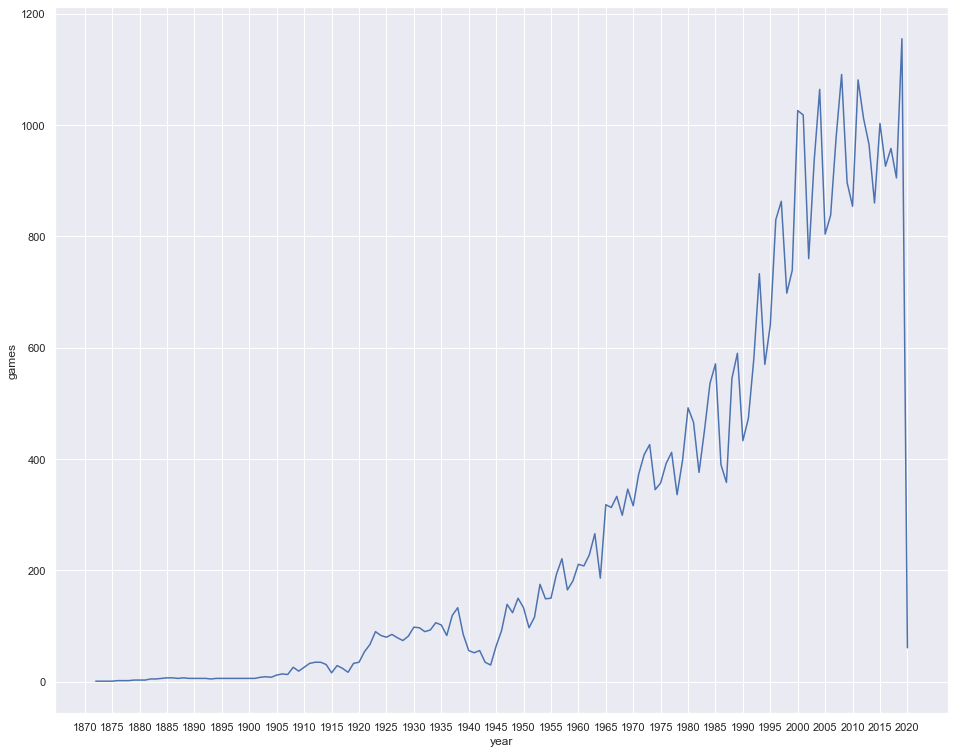

In [110]:
# sns.set(rc={'figure.figsize':(20,15)})

sns.lineplot(x='year', y='games', data=by_years)
# sns.lineplot(x='year', y='games', data=by_years, hue='world_cup')
plt.xticks([year for year in range(1870, 2025, 5)])
plt.show()

There are few interestings things going on here. At first, we can see that in 80s/90s number of games is rising, with the highest growth and it seems to hit the peak around 2008. Since then, we have slight decrease, until 2019, when we reach the highest number of games played at international level. With 1155 games played in 2019 we set a new record. 
The second things we see is a drop in number of games during World Wars. The third, since the 80s, data is very spiky, likely due to the absence/presence of world cups or other events.

## Which teams played the most games?
Let's start by checking which teams have the most richest history? My first guess was England or Brazil.
To be honest, I didn't expect Poland as a eleventh team with highest games played. Most top 10 countries are major soccer nation such as England, Brazil, Argentina, Germany, Uruguay, France or Italy. Hungary, Mexico are also old teams as they participated in the first world cups (1930 or/and 1934)


In [111]:
home_teams_count = data.groupby(['home_team'])['date'].count()
away_teams_count = data.groupby(['away_team'])['date'].count()

all_teams_count = home_teams_count + away_teams_count
all_teams_count.sort_values(ascending=False).head(15)

Sweden         1020.0
England        1011.0
Brazil          981.0
Argentina       980.0
Germany         951.0
Hungary         930.0
Uruguay         884.0
Mexico          869.0
South Korea     862.0
France          842.0
Poland          817.0
Norway          806.0
Italy           802.0
Switzerland     799.0
Denmark         797.0
Name: date, dtype: float64

In [112]:
# checking if number of games were done correctly
len(data[(data['home_team'] == 'Sweden') | (data['away_team'] == 'Sweden')])
len(data[(data['home_team'] == 'France') | (data['away_team'] == 'France')])

842

## Which teams won the most games?

As seen below, Brazil won the most games in international football history. Brazil is also the most successful team in The World Cup tournaments - winning 5 titles (last in 2002). The runner-up in our ranking is England with 573 wins. England only raised the World Cup once in 1966. The third place belongs to Germany with 555 wins (Germany won World Cup 4 times, last in 2014). 

In [113]:
most_wins = pd.DataFrame(data.groupby('winner')['winner'].count().index)
most_wins['games_won'] = pd.DataFrame(data.groupby('winner')['winner'].count().values)
most_wins = most_wins.sort_values(by='games_won', ascending=False).iloc[1:]
most_wins.head(5)

,winner,games_won
36,Brazil,625
84,England,573
103,Germany,555
12,Argentina,526
253,Sweden,500


<AxesSubplot:xlabel='winner', ylabel='games_won'>

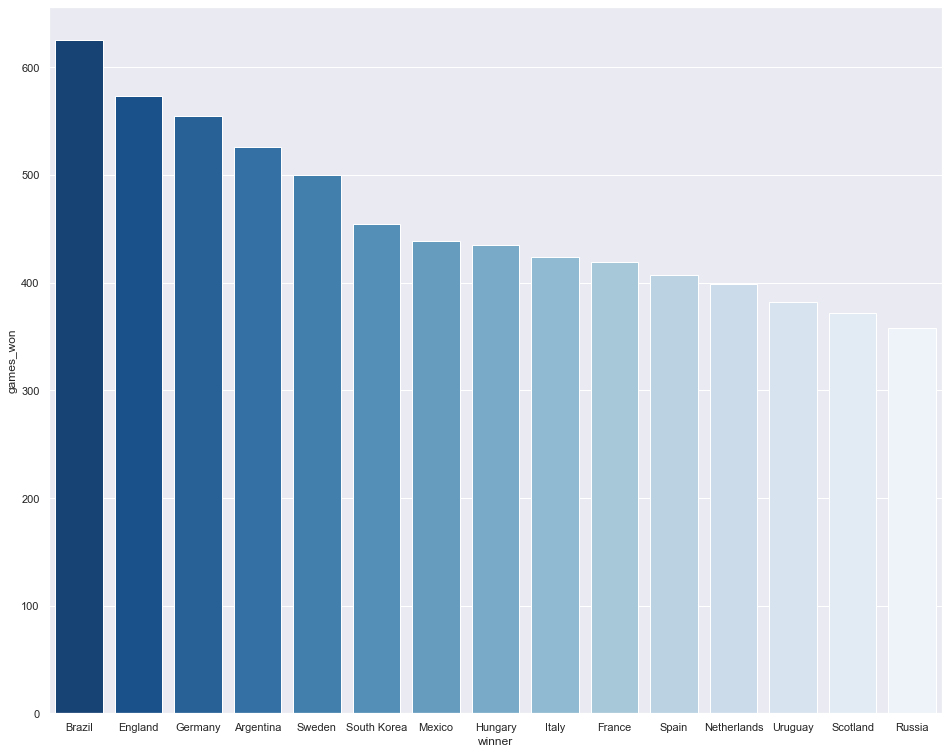

In [114]:
sns.barplot(data=most_wins[:15], x='winner', y='games_won', palette='Blues_r')

## Home Games

To analyze home games, we will start creating a new data frame. 

In [115]:
home_games = pd.DataFrame(data.groupby('home_team')['home_score', 'away_score'].sum())
home_games['Home Scored/Conceded'] = home_games['home_score'] / home_games['away_score']
home_games['home_games_played'] = home_teams_count
home_games['games_won'] = pd.DataFrame(data.groupby('home_team')['outcome'].apply(lambda row: (row == 'H').sum()))
home_games['Winrate'] = (home_games['games_won']/home_games['home_games_played']) * 100
home_games.columns = ['Scored', 'Conceded','Scored/Conceded', 'H Games', 'H Won', 'Winrate']
home_games = home_games.reset_index()
home_games.set_index('home_team', inplace=True)
home_games.sample(5)

,Scored,Conceded,Scored/Conceded,H Games,H Won,Winrate
home_team,,,,,,
Hong Kong,411,367,1.119891,245,91,37.142857
Philippines,160,171,0.935673,101,44,43.564356
Bhutan,28,79,0.354430,27,6,22.222222
Libya,317,159,1.993711,184,100,54.347826
Cambodia,180,243,0.740741,126,40,31.746032


In [116]:
home_games_more_than_50 = home_games[home_games['H Games'] > 50]
home_games_more_than_50 = home_games_more_than_50.sort_values(by='Winrate', ascending=False).head(15)

### Top 5

In [117]:
home_games_more_than_50.head(5)

,Scored,Conceded,Scored/Conceded,H Games,H Won,Winrate
home_team,,,,,,
Brazil,1403,471,2.978769,568,404,71.126761
Spain,848,267,3.176030,360,246,68.333333
Argentina,1206,478,2.523013,548,361,65.875912
Czech Republic,313,129,2.426357,146,96,65.753425
North Korea,268,99,2.707071,126,81,64.285714


In [118]:
# data[data['home_team'] == 'Cascadia']

### We will display top 15 team with the highest winrate, but they must have more than 50 home games played.

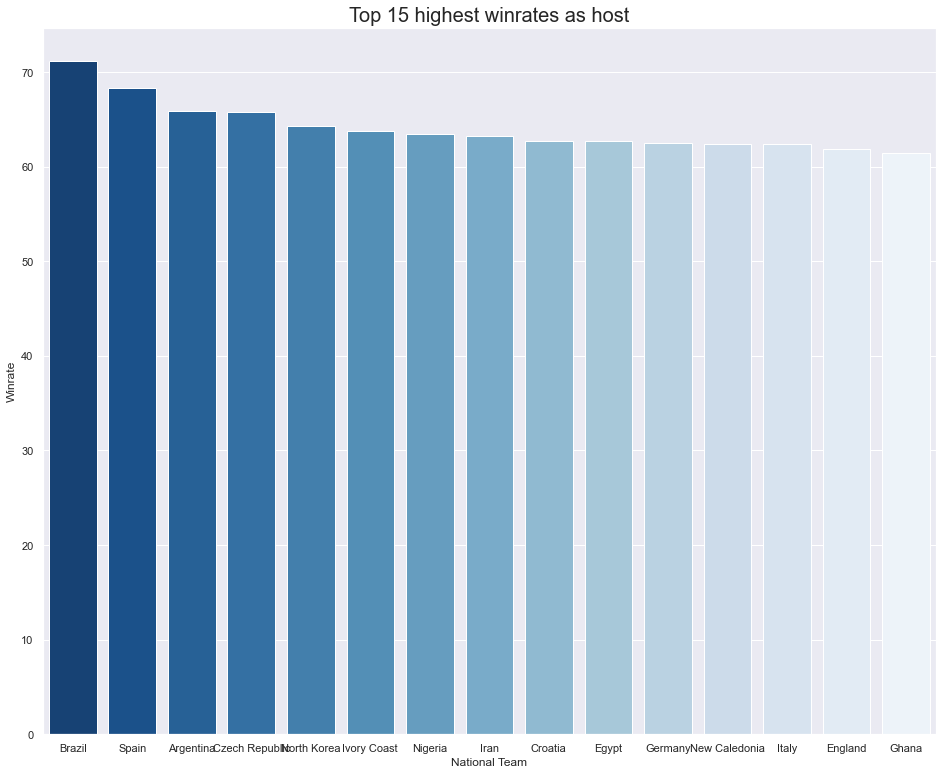

In [119]:
ax = sns.barplot(data=home_games_more_than_50,x=home_games_more_than_50.index, y='Winrate', palette='Blues_r')
ax.set_title('Top 15 highest winrates as host')
ax.set_xlabel('National Team')
ax.title.set_size(20)

In [120]:
# checking if applied correctly
data[(data['home_team'] == 'Abkhazia')].count()['home_team']

18

In [125]:
most_home_games = home_games[home_games['H Games'] > 50].sort_values(by='H Won', ascending=False).head(15)
most_home_games.head()

,Scored,Conceded,Scored/Conceded,H Games,H Won,Winrate
home_team,,,,,,
Brazil,1403,471,2.978769,568,404,71.126761
Argentina,1206,478,2.523013,548,361,65.875912
Germany,1247,523,2.384321,507,317,62.524655
England,1149,447,2.570470,498,308,61.847390
Mexico,1025,462,2.218615,513,302,58.869396


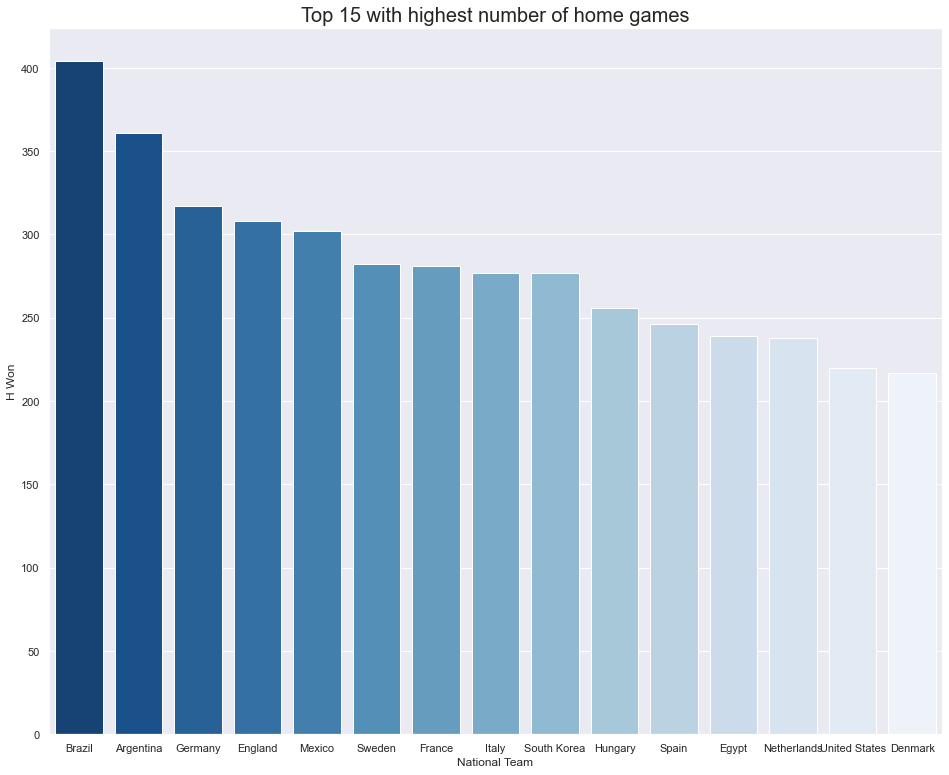

In [127]:
ax = sns.barplot(data=most_home_games, x=most_home_games.index, y='H Won', palette='Blues_r')
ax.set_title('Top 15 with highest number of home games')
ax.set_xlabel('National Team')
ax.title.set_size(20)

## Away Games

In [123]:
away_games = pd.DataFrame(data.groupby('away_team')['away_score', 'home_score'].sum())
away_games['Away Scored/Conceded'] = away_games['away_score'] / away_games['home_score']
away_games['away_games_played'] = away_teams_count
away_games['a_games_won'] = pd.DataFrame(data.groupby('away_team')['outcome'].apply(lambda row: (row == 'A').sum()))
away_games['Winrate'] = (away_games['a_games_won']/away_games['away_games_played']) * 100
away_games.columns = ['Scored', 'Conceded','Scored/Conceded', 'A Games', 'A Won', 'Winrate']
away_games = away_games.reset_index()
away_games.set_index('away_team', inplace=True)
away_games[away_games['A Games'] > 50].sort_values(by='Winrate', ascending=False).head(15)

,Scored,Conceded,Scored/Conceded,A Games,A Won,Winrate
away_team,,,,,,
Germany,879,573,1.534031,444,238,53.603604
Brazil,746,422,1.767773,413,221,53.510896
England,1060,547,1.937843,513,265,51.656920
Tahiti,285,223,1.278027,116,56,48.275862
Spain,557,360,1.547222,336,161,47.916667
South Korea,577,433,1.332564,394,177,44.923858
Croatia,239,195,1.225641,167,74,44.311377
Russia,594,414,1.434783,396,174,43.939394
Netherlands,636,542,1.173432,368,161,43.750000


In [128]:
data[data['away_team'] == 'Surrey']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,winner,loser,year,month,day,decade
39712,2018-05-06,Barawa,Surrey,1,3,Friendly,London,England,False,A,Surrey,Barawa,2018,05,06,2011-2020


In [129]:
away_games_more_than_50 = away_games[away_games['A Games'] > 50]
away_games_more_than_50 = away_games_more_than_50.sort_values(by='Winrate', ascending=False).head(15)

In [130]:
away_games_more_than_50.head()

,Scored,Conceded,Scored/Conceded,A Games,A Won,Winrate
away_team,,,,,,
Germany,879,573,1.534031,444,238,53.603604
Brazil,746,422,1.767773,413,221,53.510896
England,1060,547,1.937843,513,265,51.656920
Tahiti,285,223,1.278027,116,56,48.275862
Spain,557,360,1.547222,336,161,47.916667


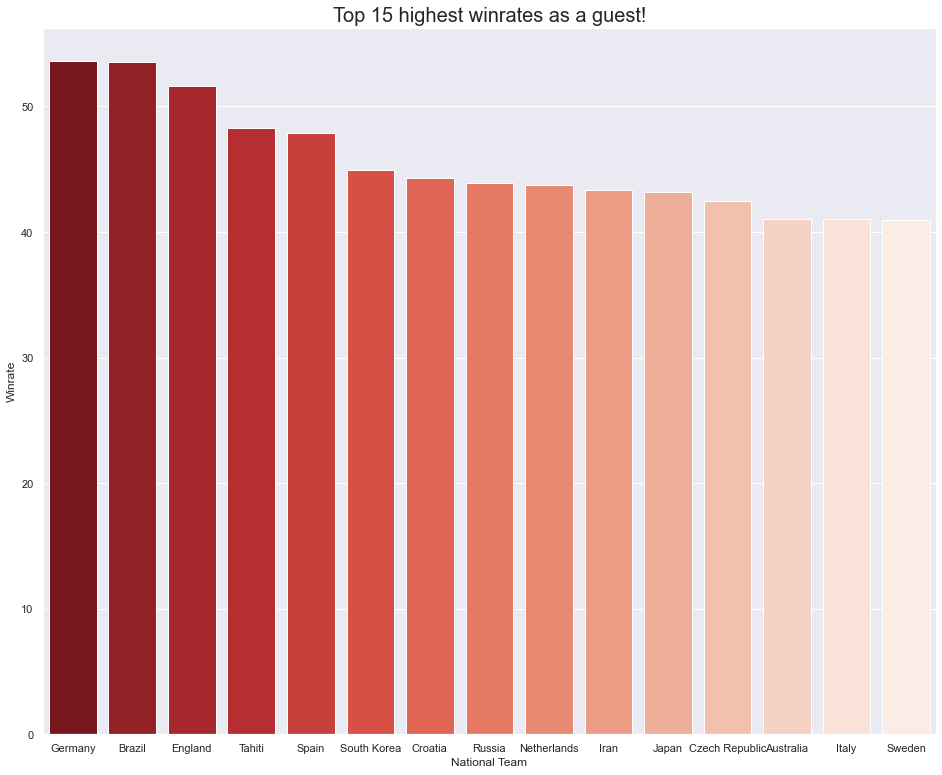

In [135]:
ax = sns.barplot(data=away_games_more_than_50,x=away_games_more_than_50.index, y='Winrate', palette='Reds_r')
ax.set_title('Top 15 highest winrates as a guest!')
ax.set_xlabel('National Team')
ax.title.set_size(20)

In [137]:
most_away_games = away_games[away_games['A Games'] > 50].sort_values(by='A Won', ascending=False).head(15)
most_away_games.head()

,Scored,Conceded,Scored/Conceded,A Games,A Won,Winrate
away_team,,,,,,
England,1060,547,1.937843,513,265,51.656920
Germany,879,573,1.534031,444,238,53.603604
Brazil,746,422,1.767773,413,221,53.510896
Sweden,881,749,1.176235,532,218,40.977444
Uruguay,777,790,0.983544,541,192,35.489834


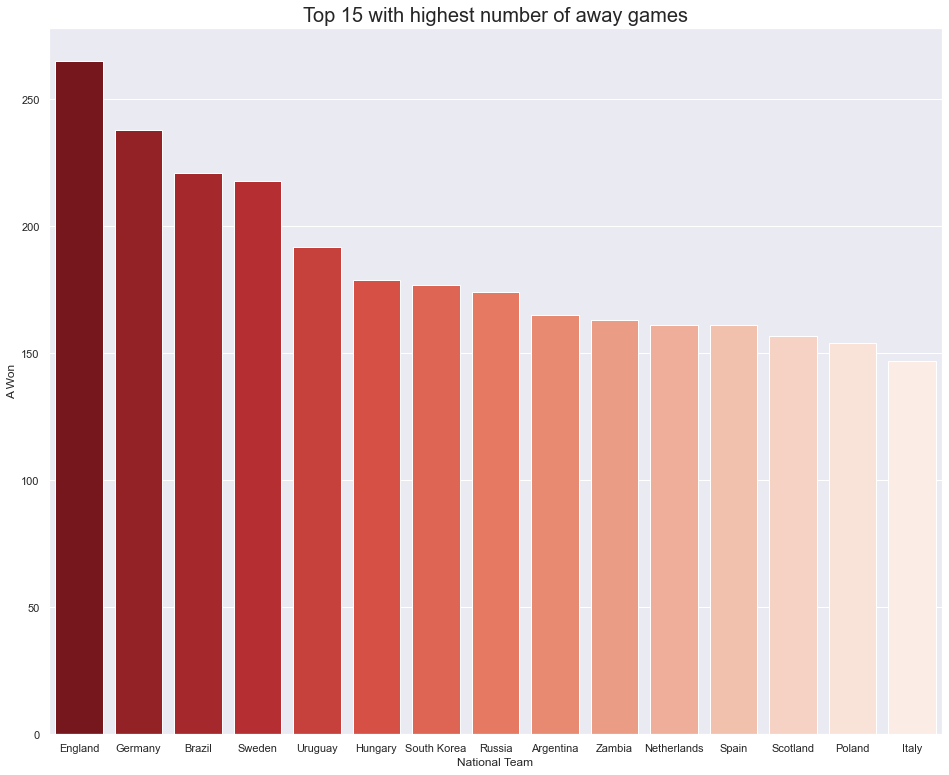

In [139]:
ax = sns.barplot(data=most_away_games, x=most_away_games.index, y='A Won', palette='Reds_r')
ax.set_title('Top 15 with highest number of away games')
ax.set_xlabel('National Team')
ax.title.set_size(20)

## All games stats

The last thing we gonna do in version 1 of this project is merge 'home' and 'away' stats.

In [148]:
all_games = home_games.merge(away_games, left_index=True, right_index=True)
all_games.head(10)

,Scored_x,Conceded_x,Scored/Conceded_x,H Games,H Won,Winrate_x,Scored_y,Conceded_y,Scored/Conceded_y,A Games,A Won,Winrate_y
Abkhazia,36,11,3.272727,18,9,50.000000,12,13,0.923077,10,3,30.000000
Afghanistan,51,61,0.836066,40,17,42.500000,63,162,0.388889,71,13,18.309859
Albania,195,203,0.960591,176,62,35.227273,112,322,0.347826,158,23,14.556962
Alderney,5,27,0.185185,7,0,0.000000,10,48,0.208333,12,3,25.000000
Algeria,521,250,2.084000,292,161,55.136986,186,271,0.686347,213,53,24.882629
American Samoa,24,140,0.171429,24,4,16.666667,12,166,0.072289,24,1,4.166667
Andalusia,23,13,1.769231,12,7,58.333333,2,1,2.000000,1,1,100.000000
Andorra,27,179,0.150838,84,6,7.142857,18,248,0.072581,82,0,0.000000
Angola,245,148,1.655405,171,82,47.953216,155,225,0.688889,181,39,21.546961
Anguilla,14,56,0.250000,21,2,9.523810,23,198,0.116162,40,1,2.500000
